In [1]:
import os
import random
import sys
import json

import numpy as np
import pandas as pd
from pandas.io.stata import StataReader

from matplotlib import pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split



from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import SpectralClustering

#from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


Initial Exploration and some cleaning

In [2]:
food_nlss1 = pd.read_stata("NLSS1/Z05a.dta",convert_categoricals=True).fillna(0.00)
print("total unique households = " + str(len(food_nlss1['WWWHH'].unique())))
print("total unique items = " + str(len(food_nlss1['S05A_ITM'].unique())))

total unique households = 3373
total unique items = 67


In [3]:
food_nlss1.drop('WWW',axis=1,inplace=True) #drop VDC code
food_nlss1.drop('HH',axis=1,inplace=True) #drop Household code



food_nlss1.head()

,WWWHH,S05A_ITM,S05A_02,S05A_03A,S05A_03B,S05A_04,S05A_05,S05A_06A,S05A_06B,S05A_07,S05A_08
0,101.0,12,4.0,75.0,1.0,900.0,8.0,75.0,1.0,900.0,0.0
1,101.0,14,0.0,0.0,0.0,0.0,1.0,15.0,1.0,105.0,0.0
2,101.0,16,0.0,0.0,0.0,0.0,6.0,25.0,1.0,250.0,0.0
3,101.0,22,0.0,0.0,0.0,0.0,12.0,5.0,1.0,115.0,0.0
4,101.0,31,0.0,0.0,0.0,0.0,2.0,21.0,9.0,63.0,0.0


Unique food Items and some popular Items

In [4]:
df_explore = food_nlss1


df_explore['S05A_ITM'] = df_explore['S05A_ITM'].astype('category')





food_category_purchase = df_explore[['S05A_04','S05A_ITM']]\
.groupby('S05A_ITM')['S05A_04'] \
.mean()

food_category_purchase.index = ['Fine rice','Coarse rice','Beaten/Flattened rice' ,'Maize','Maize flour',\
                              'Wheat flour','Millet','Other grains/cerials','Black pulse','Masoor','Rahar','Gram',\
                              'Other pulses','Other beans','Eggs','Milk','Condensed milk','Baby milk/powder milk',\
                              'Curd','Other milk Products','Ghee','vegetable oil','Mustard oil','Other oil',\
                              'Potatoes/Sweet Potatoes','Onions','Cauliflower/Cabbage','Tomatoes',\
                              'Greeen leafy Vegetables','Other Vegetables','Bananas','Citrus Fruits','Mangoes',\
                              'Apples','Pineapple','Papaya','Other fruits','Dried fruits','Fish','Mutton',\
                              'Buffalo meat','Chicken','Other meats','Salt','Cumin seed/black pepper',\
                              'turmeric','Ginger and Garlic','chilies','Other spices and condements','Sugar',\
                              'Caramel','Sweets','Sugar Candy','Tea','Coffee','Carbonated drinks',\
                              'Other non-alcoholic drinks','Wine','Gin, Whiskey','Beer','Other alcoholic drinks',\
                              'Cigarettes','Bidis','Tobacco','Other  tobaco products',\
                              'Meals taken Outside home','other food expences']

food_purchase_dict =  food_category_purchase.sort_values(ascending=False).to_dict()

food_category_grown = df_explore[['S05A_07','S05A_ITM']]\
.groupby('S05A_ITM')['S05A_07'] \
.mean()

food_category_grown.index = ['Fine rice','Coarse rice','Beaten/Flattened rice' ,'Maize','Maize flour',\
                              'Wheat flour','Millet','Other grains/cerials','Black pulse','Masoor','Rahar','Gram',\
                              'Other pulses','Other beans','Eggs','Milk','Condensed milk','Baby milk/powder milk',\
                              'Curd','Other milk Products','Ghee','vegetable oil','Mustard oil','Other oil',\
                              'Potatoes/Sweet Potatoes','Onions','Cauliflower/Cabbage','Tomatoes',\
                              'Greeen leafy Vegetables','Other Vegetables','Bananas','Citrus Fruits','Mangoes',\
                              'Apples','Pineapple','Papaya','Other fruits','Dried fruits','Fish','Mutton',\
                              'Buffalo meat','Chicken','Other meats','Salt','Cumin seed/black pepper',\
                              'turmeric','Ginger and Garlic','chilies','Other spices and condements','Sugar',\
                              'Caramel','Sweets','Sugar Candy','Tea','Coffee','Carbonated drinks',\
                              'Other non-alcoholic drinks','Wine','Gin, Whiskey','Beer','Other alcoholic drinks',\
                              'Cigarettes','Bidis','Tobacco','Other  tobaco products',\
                              'Meals taken Outside home','other food expences']

food_growth_dict =  food_category_grown.sort_values(ascending=False).to_dict()


food_names = list(food_purchase_dict.keys())[:20]
count_values = list(food_purchase_dict.values())[:20]

food_names_g = list(food_growth_dict.keys())[:20]
count_values_g = list(food_growth_dict.values())[:20]


def plot_bar_graph(x,y,title):
    fig, axs = plt.subplots(1, 1, figsize=(20, 10), sharey=True)
    axs.bar(x, y)
    axs.set_title(title)
    plt.xticks(rotation =90)

    # data labels
    for i, v in enumerate(y):
        axs.text(i-.25, 
                  v+10, 
                  y[i], 
                  fontsize=8, 
                  #color=label_color_list[i]
                )
    return plt.show()

In [5]:

def plot_bar_graph(x,y,title):
    fig, axs = plt.subplots(1, 1, figsize=(20, 10), sharey=True)
    axs.bar(x, y)
    axs.set_title(title)
    plt.xticks(rotation =90)

    # data labels
    for i, v in enumerate(y):
        axs.text(i-.25, 
                  v+10, 
                  y[i], 
                  fontsize=8, 
                  #color=label_color_list[i]
                )
    return plt.show()


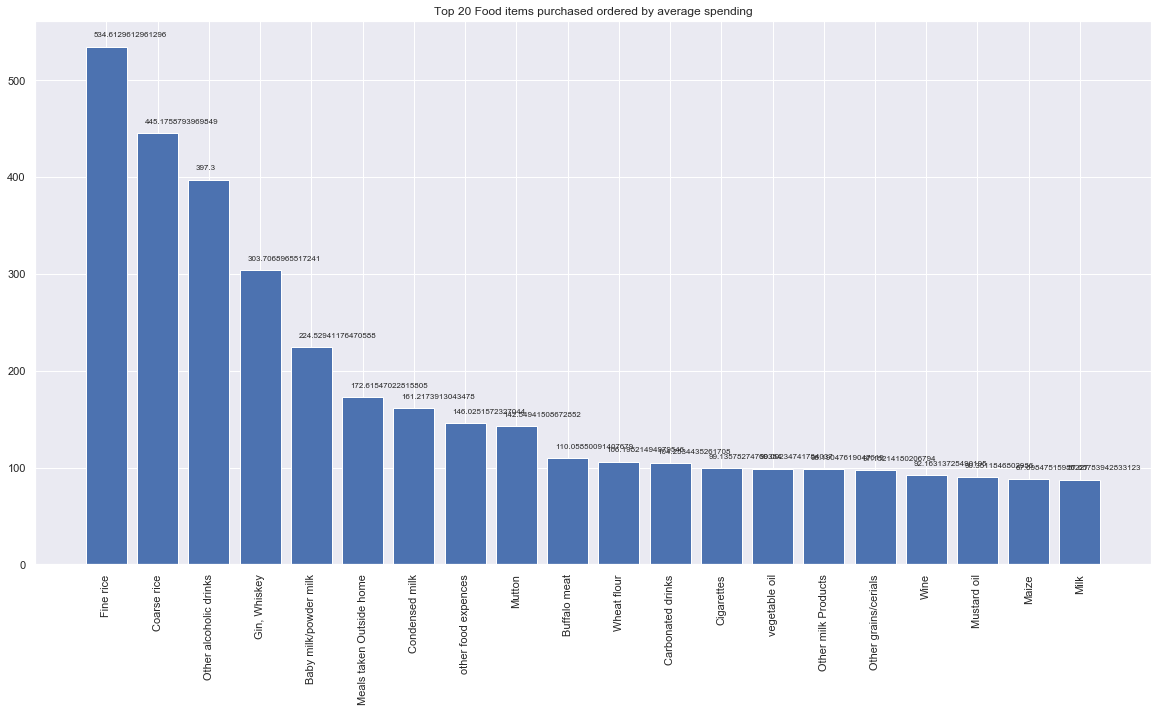

In [6]:
plot_bar_graph(food_names,count_values,"Top 20 Food items purchased ordered by average spending")

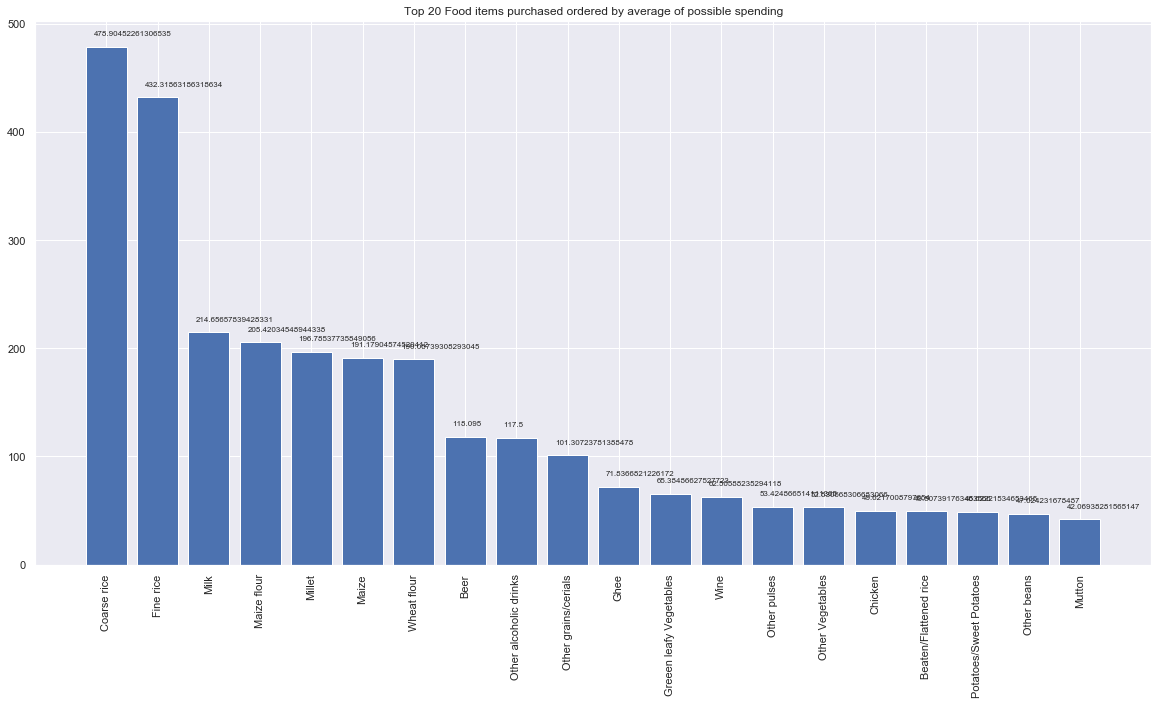

In [7]:
plot_bar_graph(food_names_g,count_values_g,"Top 20 Food items purchased ordered by average of possible spending")

In [8]:
food_nlss1 = pd.read_stata("NLSS1/Z05a.dta",convert_categoricals=True).fillna(0.00)
food_nlss1.drop('WWW',axis=1,inplace=True) 
food_nlss1.drop('HH',axis=1,inplace=True) 
food_nlss1.drop('S05A_02',axis=1,inplace=True)
food_nlss1.drop('S05A_04',axis=1,inplace=True)
food_nlss1.drop('S05A_05',axis=1,inplace=True)
food_nlss1.drop('S05A_07',axis=1,inplace=True)
food_nlss1.drop('S05A_08',axis=1,inplace=True)

In [9]:
food_nlss1.head(5)

,WWWHH,S05A_ITM,S05A_03A,S05A_03B,S05A_06A,S05A_06B
0,101.0,12,75.0,1.0,75.0,1.0
1,101.0,14,0.0,0.0,15.0,1.0
2,101.0,16,0.0,0.0,25.0,1.0
3,101.0,22,0.0,0.0,5.0,1.0
4,101.0,31,0.0,0.0,21.0,9.0


Exploration and data processing

In [10]:
food_nlss1.columns

Index(['WWWHH', 'S05A_ITM', 'S05A_03A', 'S05A_03B', 'S05A_06A', 'S05A_06B'], dtype='object')

In [11]:
food_nlss1.columns=['WWWHH','item','amount_purchased','unit_purchased','amount_grown','unit_grown']

In [12]:
food_nlss1.head(5)

,WWWHH,item,amount_purchased,unit_purchased,amount_grown,unit_grown
0,101.0,12,75.0,1.0,75.0,1.0
1,101.0,14,0.0,0.0,15.0,1.0
2,101.0,16,0.0,0.0,25.0,1.0
3,101.0,22,0.0,0.0,5.0,1.0
4,101.0,31,0.0,0.0,21.0,9.0


Data Frame For K-means

In [13]:
#convert all units in grams
l1 = []
for i in food_nlss1['unit_purchased']:
    if i == 0.0:
        l1.append(0.0)
    if i == 1.0:
        l1.append(1.0e3)
    if i == 2.0:
        l1.append(1.0)
    if i == 3.0:
        l1.append(37.3242*1.0e3)
    if i == 4.0:
        l1.append(1.0e3)
    if i == 5.0:
        l1.append(87215*1.0e3)
    if i == 6.0:
        l1.append(4361*1.0e3)
    if i == 7.0:
        l1.append(0.545*1.0e3)
    if i == 8.0:
        l1.append(1.0e3)
    if i == 9.0:
        l1.append(100.0)
    if i == 10.0:
        l1.append(500.0)
food_nlss1['unit_purchased']= l1


  
        

In [14]:
l2 = []
for i in food_nlss1['unit_grown']:
    if i == 0.0:
        l2.append(0.0)
    if i == 1.0:
        l2.append(1.0e3)
    if i == 2.0:
        l2.append(1.0)
    if i == 3.0:
        l2.append(37.3242*1.0e3)
    if i == 4.0:
        l2.append(1.0e3)
    if i == 5.0:
        l2.append(87215*1.0e3)
    if i == 6.0:
        l2.append(4361*1.0e3)
    if i == 7.0:
        l2.append(0.545*1.0e3)
    if i == 8.0:
        l2.append(1.0e3)
    if i == 9.0:
        l2.append(100.0)
    if i == 10.0:
        l2.append(500.0)
food_nlss1['unit_grown']= l2


In [15]:
food_nlss1.head(5)


,WWWHH,item,amount_purchased,unit_purchased,amount_grown,unit_grown
0,101.0,12,75.0,1000.0,75.0,1000.0
1,101.0,14,0.0,0.0,15.0,1000.0
2,101.0,16,0.0,0.0,25.0,1000.0
3,101.0,22,0.0,0.0,5.0,1000.0
4,101.0,31,0.0,0.0,21.0,100.0


In [16]:
food_nlss1['consumption_purchase']=food_nlss1.apply(lambda row: row['amount_purchased']*row['unit_purchased'], axis=1)
food_nlss1['consumption_grown']=food_nlss1.apply(lambda row: row['amount_grown']*row['unit_grown'], axis=1)

Gram_intake = food_nlss1

In [17]:
food_nlss1.head(5)

,WWWHH,item,amount_purchased,unit_purchased,amount_grown,unit_grown,consumption_purchase,consumption_grown
0,101.0,12,75.0,1000.0,75.0,1000.0,75000.0,75000.0
1,101.0,14,0.0,0.0,15.0,1000.0,0.0,15000.0
2,101.0,16,0.0,0.0,25.0,1000.0,0.0,25000.0
3,101.0,22,0.0,0.0,5.0,1000.0,0.0,5000.0
4,101.0,31,0.0,0.0,21.0,100.0,0.0,2100.0


In [98]:
#total consumption of food groups in grams

# Grain/Cerial
grains_ = pd.DataFrame(food_nlss1[food_nlss1.item >= 11]\
[food_nlss1[food_nlss1.item >= 11].item <= 18]\
.set_index(['WWWHH']))
grain_consumption = pd.DataFrame(pd.DataFrame(grains_[['consumption_purchase','consumption_grown']]\
                                              .groupby('WWWHH')[['consumption_purchase','consumption_grown']].sum())\
[['consumption_purchase','consumption_grown']].sum(axis=1),columns=['grains_cerials'])
#grain_consumption['grains/cerials']=grain_consumption.apply(lambda row: row['grains/cerials']*4e-3, axis=1)

#Pulses/Lentals
pulses_ = pd.DataFrame(food_nlss1[food_nlss1.item >= 21]\
[food_nlss1[food_nlss1.item >= 21].item <= 26]\
.set_index(['WWWHH']))
pulses_consumption = pd.DataFrame(pd.DataFrame(pulses_[['consumption_purchase','consumption_grown']]\
                                               .groupby('WWWHH')[['consumption_purchase','consumption_grown']].sum())\
[['consumption_purchase','consumption_grown']].sum(axis=1),columns=['pulses_lentals'])
#pulses_consumption['pulses/lentals']=pulses_consumption.apply(lambda row: row['pulses/lentals']*4e-3, axis=1)

# poultry/Dairy
dairy_ = pd.DataFrame(food_nlss1[food_nlss1.item >= 31]\
[food_nlss1[food_nlss1.item >= 31].item <= 36]\
.set_index(['WWWHH']))
dairy_consumption = pd.DataFrame(pd.DataFrame(dairy_[['consumption_purchase','consumption_grown']]\
                                              .groupby('WWWHH')[['consumption_purchase','consumption_grown']].sum())\
[['consumption_purchase','consumption_grown']].sum(axis=1),columns=['dairy'])
#dairy_consumption['poultry/dairy']=dairy_consumption.apply(lambda row: row['poultry/dairy']*9e-3, axis=1)

#Oil/Fat

oil_ = pd.DataFrame(food_nlss1[food_nlss1.item >= 41]\
[food_nlss1[food_nlss1.item >= 41].item <= 44]\
.set_index(['WWWHH']))
oil_consumption = pd.DataFrame(pd.DataFrame(oil_[['consumption_purchase','consumption_grown']]\
                                            .groupby('WWWHH')[['consumption_purchase','consumption_grown']].sum())\
[['consumption_purchase','consumption_grown']].sum(axis=1),columns=['oil_fat'])
#oil_consumption['oil/fat']=oil_consumption.apply(lambda row: row['oil/fat']*9e-3, axis=1)

#Vegetables
vegetables_ = pd.DataFrame(food_nlss1[food_nlss1.item >= 51]\
[food_nlss1[food_nlss1.item >= 51].item <= 56]\
.set_index(['WWWHH']))
vegetables_consumption = pd.DataFrame(pd.DataFrame(vegetables_[['consumption_purchase','consumption_grown']]\
                                                   .groupby('WWWHH')[['consumption_purchase','consumption_grown']].sum())\
[['consumption_purchase','consumption_grown']].sum(axis=1),columns=['vegetables'])
#vegetables_consumption['vegetables']=vegetables_consumption.apply(lambda row: row['vegetables']*4e-3, axis=1)

#Fruits
fruits_ = pd.DataFrame(food_nlss1[food_nlss1.item >= 61]\
[food_nlss1[food_nlss1.item >= 61].item <= 68]\
.set_index(['WWWHH']))
fruits_consumption = pd.DataFrame(pd.DataFrame(fruits_[['consumption_purchase','consumption_grown']]\
                                               .groupby('WWWHH')[['consumption_purchase','consumption_grown']].sum())\
[['consumption_purchase','consumption_grown']].sum(axis=1),columns=['fruits'])
#fruits_consumption['fruits']=fruits_consumption.apply(lambda row: row['fruits']*4e-3, axis=1)

#Meat/Fish
meat_ = pd.DataFrame(food_nlss1[food_nlss1.item >= 71]\
[food_nlss1[food_nlss1.item >= 71].item <= 75]\
.set_index(['WWWHH']))
meat_consumption = pd.DataFrame(pd.DataFrame(meat_[['consumption_purchase','consumption_grown']]\
                                             .groupby('WWWHH')[['consumption_purchase','consumption_grown']].sum())\
[['consumption_purchase','consumption_grown']].sum(axis=1),columns=['meat_fish'])
#meat_consumption['meat/fish']=meat_consumption.apply(lambda row: row['meat/fish']*4e-3, axis=1)

#Sugar
sugar_ = pd.DataFrame(food_nlss1[food_nlss1.item >= 91]\
[food_nlss1[food_nlss1.item >= 91].item <= 94]\
.set_index(['WWWHH']))
sugar_consumption = pd.DataFrame(pd.DataFrame(sugar_[['consumption_purchase','consumption_grown']]\
                                              .groupby('WWWHH')[['consumption_purchase','consumption_grown']].sum())\
[['consumption_purchase','consumption_grown']].sum(axis=1),columns=['sugar'])
#sugar_consumption['sugar']=sugar_consumption.apply(lambda row: row['sugar']*9e-3, axis=1)



#Merge all these individual Datasets
df_consumption = pd.merge(grain_consumption, pulses_consumption, \
                          left_on = 'WWWHH', right_on = 'WWWHH')
df_consumption = pd.merge(df_consumption, dairy_consumption, \
                          left_on = 'WWWHH', right_on = 'WWWHH')
df_consumption = pd.merge(df_consumption, oil_consumption, \
                          left_on = 'WWWHH', right_on = 'WWWHH')
df_consumption = pd.merge(df_consumption, vegetables_consumption, \
                          left_on = 'WWWHH', right_on = 'WWWHH')
df_consumption = pd.merge(df_consumption, fruits_consumption, \
                          left_on = 'WWWHH', right_on = 'WWWHH')
df_consumption = pd.merge(df_consumption, meat_consumption, \
                          left_on = 'WWWHH', right_on = 'WWWHH')
df_consumption = pd.merge(df_consumption, sugar_consumption, \
                          left_on = 'WWWHH', right_on = 'WWWHH')

df = df_consumption








In [19]:
df_consumption.head(5)


def plot_bar_graph2(x,y,title):
    fig, axs = plt.subplots(1, 1, figsize=(20, 10), sharey=True)
    axs.bar(x, y)
    axs.set_title(title)
    plt.xticks(rotation =90)

    # data labels
    for i, v in enumerate(y):
        axs.text(i-.25, 
                  v+10, 
                  y[i], 
                  fontsize=8, 
                  #color=label_color_list[i]
                )
    return plt.show()



    

    

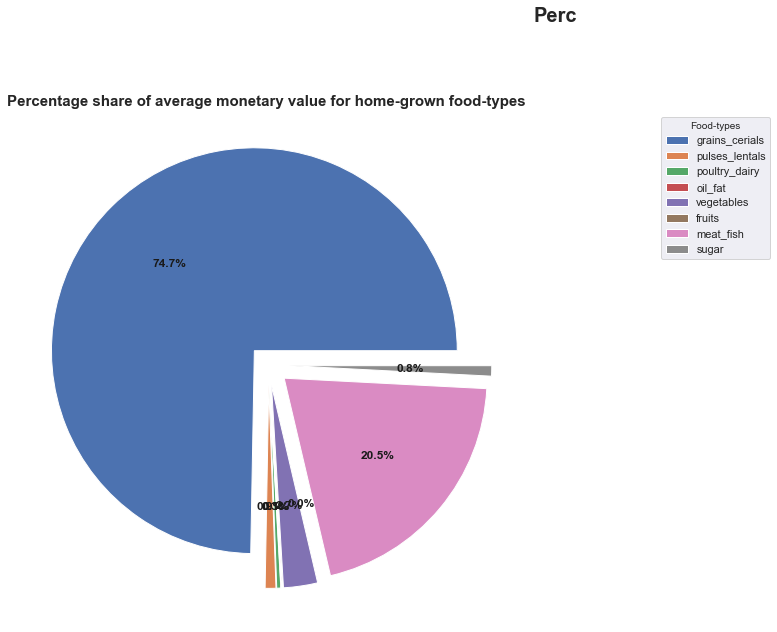

In [21]:
df_dic = df_consumption.mean(axis=0)

list11_=[]  
for i in range (0,df_dic.shape[0]): 
    # Create list for the current row 
 
    list11_.append(df_dic[i]) 
list11_

    
inc = ['grains_cerials', 'pulses_lentals', 
              'poultry_dairy', 'oil_fat', 'vegetables', 
              'fruits', 'meat_fish', 'sugar'] 






fig = plt.figure()
ax0 = plt.subplot(1,2,1)

explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1) 



wedges, texts, autotexts = ax0.pie(list11_,explode=explode, autopct='%1.1f%%',
                                  textprops=dict(color="k"))


plt.setp(autotexts, size=12, weight="bold")

ax0.set_title('Percentage share of average monetary value for home-grown food-types '\
              ,y=1,fontsize=15,fontweight='bold')
ax0.legend(wedges,inc,
          loc="best", title = 'Food-types',
          bbox_to_anchor=(1, 0, 0.5, 1))



#Set the figure size so that all four panel graphs are clearly visible
fig.set_size_inches(20,10)   
#Set a title for the figure
fig.suptitle('Perc',y=1,fontsize=20,fontweight='bold')
plt.show()






Kmeans


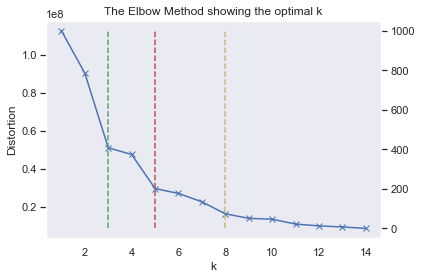

In [103]:
from scipy.spatial.distance import cdist
# k means determine k
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_consumption)
    kmeanModel.fit(df_consumption)
    distortions.append(sum(np.min(cdist(df_consumption, kmeanModel.cluster_centers_, \
                                        'euclidean'), axis=1)) / df_consumption.shape[0])
y0 = np.linspace(0, 1000,1000)
x0= 3*np.ones(1000)
y = np.linspace(0, 1000,1000)
x= 5*np.ones(1000)
y2 = np.linspace(0, 1000,1000)
x2= 8*np.ones(1000)
# Plot the elbow
ax = plt.subplot()
ax.plot(K, distortions, 'bx-')
axx = ax.twinx()
axx.plot(x,y,"--r")
axx.plot(x2,y2,"--y")
axx.plot(x0,y0,"--g")
ax.set_xlabel('k')
ax.grid(False)
axx.grid(False)
ax.set_ylabel('Distortion')
ax.set_title('The Elbow Method showing the optimal k')
plt.show()

In [41]:

#K-means k=5
random.seed(10)
scaler = MinMaxScaler()
ddf_scaled = scaler.fit_transform(df_consumption)
kmeans = KMeans(n_clusters=5, max_iter=600, init ='k-means++', algorithm = 'auto')
kmeans.fit(ddf_scaled)








KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
df_consumption['total'] = df_consumption.sum(axis=1)
 
def percentage_share(df):
    for i in df.columns:
        df[i] = df.apply(lambda row: (row[i]/row['total']*100), axis=1) 
    return df


df_consumption = percentage_share(df_consumption)
df_consumption.drop('total',axis=1,inplace=True)
df_consumption['cluster_label']= kmeans.predict(ddf_scaled)

df_c = df_consumption.set_index('cluster_label')
consumption_share_cluster = df_c.groupby('cluster_label')[df_c.columns].mean()
consumption_share_cluster.columns = ['grains_cerials', 'pulses_lentals', 
              'poultry_dairy', 'oil_fat', 'vegetables', 
              'fruits', 'meat_fish', 'sugar'] 
consumption_share_cluster.sort_values(["fruits"],ascending=True)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


,grains_cerials,pulses_lentals,poultry_dairy,oil_fat,vegetables,fruits,meat_fish,sugar
cluster_label,,,,,,,,
2,86.377041,0.727356,0.019088,0.215470,12.653670,0.003675,0.002659,0.001040
1,66.076251,1.660805,0.062673,0.001497,32.191960,0.004629,0.001586,0.000600
3,59.300297,0.971895,38.841942,0.345977,0.528823,0.007749,0.002294,0.001023
0,73.814927,2.965131,6.920791,1.220846,8.119519,4.203408,1.541554,1.213825
4,54.475372,4.201936,6.198237,0.832427,8.597867,22.861464,0.895126,1.937572


In [43]:
spend_nlss1 = pd.read_stata("NLSS1/Z05a.dta",\
                            convert_categoricals=True).fillna(0.00)
spend_nlss1.drop('WWW',axis=1,inplace=True)
spend_nlss1.drop('HH',axis=1,inplace=True)
spend_nlss1.drop('S05A_02',axis=1,inplace=True)
spend_nlss1.drop('S05A_03A',axis=1,inplace=True)
spend_nlss1.drop('S05A_03B',axis=1,inplace=True)
spend_nlss1.drop('S05A_05',axis=1,inplace=True)
spend_nlss1.drop('S05A_06A',axis=1,inplace=True)
spend_nlss1.drop('S05A_06B',axis=1,inplace=True)
spend_nlss1.drop('S05A_08',axis=1,inplace=True)

food_spenditure = pd.DataFrame(spend_nlss1[['WWWHH','S05A_04']]\
.groupby('WWWHH')['S05A_04'].sum())

food_saving =  pd.DataFrame(spend_nlss1[['WWWHH','S05A_07']]\
.groupby('WWWHH')['S05A_07'].sum())

df_expence = pd.merge(food_spenditure, food_saving, left_on = 'WWWHH', right_on = 'WWWHH')
df_expence.columns=['price_purchase','price_growth']

df_expence['total'] = df_expence.sum(axis=1)

def percentage_share(df):
    for i in df.columns:
        df[i] = df.apply(lambda row: (row[i]/row['total']*100), axis=1) 
    return df



df_expence = percentage_share(df_expence)

df_expence.drop('total',axis=1,inplace=True)






df_expence = pd.merge(df_expence, df_consumption,\
                      left_on = 'WWWHH', right_on = 'WWWHH')
df_expence['cluster_label'] = kmeans.predict(ddf_scaled)

df_ = df_expence.set_index('cluster_label')
expence_share_cluster = df_.groupby('cluster_label')[df_.columns].mean()
expence_share_cluster.drop(['grains_cerials','pulses_lentals','dairy','oil_fat',
                            'vegetables','fruits','meat_fish','sugar'],axis=1,inplace=True)
expence_share_cluster

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


,price_purchase,price_growth
cluster_label,,
0,58.190376,41.809624
1,38.257028,61.742972
2,40.948213,59.051787
3,30.347886,69.652114
4,42.683533,57.316467


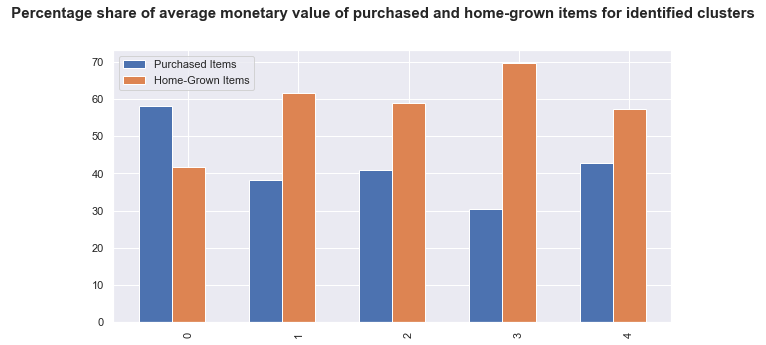

In [110]:
clusters = [0,1,2,3,4]
purchase = expence_share_cluster.price_purchase
growth = expence_share_cluster.price_growth
header = expence_share_cluster.columns.values #an array of columns headers

fig = plt.figure()
ax = plt.subplot()

#Grouped bar chart
ind = np.arange(len(clusters)) #no of x ticks; months on our data
width = 0.3 #width of the bar

#ax.bar(position of the bar wrt the x-ticks, data, width of bar, label)
ax.bar(ind - width, purchase, width,label='Purchased Items')
ax.bar(ind , growth, width,label='Home-Grown Items')
ax.legend(loc=2)
ax.yaxis.grid(True)


for tick in ax.get_xticklabels():
    tick.set_rotation(90)

#Set the figure size so that all four panel graphs are clearly visible
fig.set_size_inches(10,5)   
#Set a title for the figure
fig.suptitle(' Percentage share of average monetary value of purchased \
and home-grown items for identified clusters '\
             ,y=1,fontsize=15,fontweight='bold')
plt.show()





In [46]:
spend_nlss1.columns=['WWWHH','item','amount_purchased','amount_grown']

# Grain/Cerial
grains_ = pd.DataFrame(spend_nlss1[spend_nlss1.item >= 11]\
[spend_nlss1[spend_nlss1.item >= 11].item <= 18]\
.set_index(['WWWHH']))
grain_consumption = pd.DataFrame(pd.DataFrame(grains_[['amount_purchased']]\
                                              .groupby('WWWHH')[['amount_purchased']].sum()))
grain_consumption.columns=['grains_cerials']



#Pulses/Lentals
pulses_ = pd.DataFrame(spend_nlss1[spend_nlss1.item >= 21]\
[spend_nlss1[spend_nlss1.item >= 21].item <= 26]\
.set_index(['WWWHH']))
pulses_consumption = pd.DataFrame(pd.DataFrame(pulses_[['amount_purchased']]\
                                               .groupby('WWWHH')[['amount_purchased']].sum()))
pulses_consumption.columns=['pulses_lentals']


# poultry/Dairy
dairy_ = pd.DataFrame(spend_nlss1[spend_nlss1.item >= 31]\
[spend_nlss1[spend_nlss1.item >= 31].item <= 36]\
.set_index(['WWWHH']))
dairy_consumption = pd.DataFrame(pd.DataFrame(dairy_[['amount_purchased']]\
                                              .groupby('WWWHH')[['amount_purchased']].sum()))
dairy_consumption.columns=['dairy']


#Oil/Fat

oil_ = pd.DataFrame(spend_nlss1[spend_nlss1.item >= 41]\
[spend_nlss1[spend_nlss1.item >= 41].item <= 44]\
.set_index(['WWWHH']))
oil_consumption = pd.DataFrame(pd.DataFrame(oil_[['amount_purchased']]\
                                            .groupby('WWWHH')[['amount_purchased']].sum()))
oil_consumption.columns=['oil_fat']

#Vegetables
vegetables_ = pd.DataFrame(spend_nlss1[spend_nlss1.item >= 51]\
[spend_nlss1[spend_nlss1.item >= 51].item <= 56]\
.set_index(['WWWHH']))
vegetables_consumption = pd.DataFrame(pd.DataFrame(vegetables_[['amount_purchased']]\
                                                   .groupby('WWWHH')[['amount_purchased']].sum()))
vegetables_consumption.columns=['vegetables']

#Fruits
fruits_ = pd.DataFrame(spend_nlss1[spend_nlss1.item >= 61]\
[spend_nlss1[spend_nlss1.item >= 61].item <= 68]\
.set_index(['WWWHH']))
fruits_consumption =pd.DataFrame(pd.DataFrame(fruits_[['amount_purchased']]\
                                              .groupby('WWWHH')[['amount_purchased']].sum()))
fruits_consumption.columns=['fruits']

#Meat/Fish
meat_ = pd.DataFrame(spend_nlss1[spend_nlss1.item >= 71]\
[spend_nlss1[spend_nlss1.item >= 71].item <= 75]\
.set_index(['WWWHH']))
meat_consumption = pd.DataFrame(pd.DataFrame(meat_[['amount_purchased']]\
                                             .groupby('WWWHH')[['amount_purchased']].sum()))
meat_consumption.columns=['meat_fish']
#Sugar
sugar_ = pd.DataFrame(spend_nlss1[spend_nlss1.item >= 91]\
[spend_nlss1[spend_nlss1.item >= 91].item <= 94]\
.set_index(['WWWHH']))
sugar_consumption = pd.DataFrame(pd.DataFrame(sugar_[['amount_purchased']]\
                                              .groupby('WWWHH')[['amount_purchased']].sum()))
sugar_consumption.columns=['sugar']

#Merge all these individual Datasets
df_purchase = pd.merge(grain_consumption, pulses_consumption,\
                       left_on = 'WWWHH', right_on = 'WWWHH')
df_purchase = pd.merge(df_purchase, dairy_consumption,\
                       left_on = 'WWWHH', right_on = 'WWWHH')
df_purchase = pd.merge(df_purchase, oil_consumption,\
                       left_on = 'WWWHH', right_on = 'WWWHH')
df_purchase = pd.merge(df_purchase, vegetables_consumption,\
                       left_on = 'WWWHH', right_on = 'WWWHH')
df_purchase = pd.merge(df_purchase, fruits_consumption,\
                       left_on = 'WWWHH', right_on = 'WWWHH')
df_purchase = pd.merge(df_purchase, meat_consumption,\
                       left_on = 'WWWHH', right_on = 'WWWHH')
df_purchase = pd.merge(df_purchase, sugar_consumption,\
                       left_on = 'WWWHH', right_on = 'WWWHH')
df_purchase['total'] = df_purchase.sum(axis=1)
df_purchase = percentage_share(df_purchase)
df_purchase.drop('total',axis=1,inplace=True)
df_purchase['cluster_label'] = kmeans.predict(ddf_scaled)
df_p = df_purchase.set_index('cluster_label')


p_share_cluster = df_p.groupby('cluster_label')[df_p.columns].mean()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


In [47]:
spend_nlss1.columns=['WWWHH','item','amount_purchased','amount_grown']

# Grain/Cerial
grains_ = pd.DataFrame(spend_nlss1[spend_nlss1.item >= 11]\
[spend_nlss1[spend_nlss1.item >= 11].item <= 18]\
.set_index(['WWWHH']))
grain_consumption = pd.DataFrame(pd.DataFrame(grains_[['amount_grown']]\
                                              .groupby('WWWHH')[['amount_grown']].sum()))
grain_consumption.columns=['grains_cerials']



#Pulses/Lentals
pulses_ = pd.DataFrame(spend_nlss1[spend_nlss1.item >= 21]\
[spend_nlss1[spend_nlss1.item >= 21].item <= 26]\
.set_index(['WWWHH']))
pulses_consumption = pd.DataFrame(pd.DataFrame(pulses_[['amount_grown']]\
                                               .groupby('WWWHH')[['amount_grown']].sum()))
pulses_consumption.columns=['pulses_lentals']


# poultry/Dairy
dairy_ = pd.DataFrame(spend_nlss1[spend_nlss1.item >= 31]\
[spend_nlss1[spend_nlss1.item >= 31].item <= 36]\
.set_index(['WWWHH']))
dairy_consumption = pd.DataFrame(pd.DataFrame(dairy_[['amount_grown']]\
                                              .groupby('WWWHH')[['amount_grown']].sum()))
dairy_consumption.columns=['dairy']


#Oil/Fat

oil_ = pd.DataFrame(spend_nlss1[spend_nlss1.item >= 41]\
[spend_nlss1[spend_nlss1.item >= 41].item <= 44]\
.set_index(['WWWHH']))
oil_consumption = pd.DataFrame(pd.DataFrame(oil_[['amount_grown']]\
                                            .groupby('WWWHH')[['amount_grown']].sum()))
oil_consumption.columns=['oil_fat']

#Vegetables
vegetables_ = pd.DataFrame(spend_nlss1[spend_nlss1.item >= 51]\
[spend_nlss1[spend_nlss1.item >= 51].item <= 56]\
.set_index(['WWWHH']))
vegetables_consumption = pd.DataFrame(pd.DataFrame(vegetables_[['amount_grown']]\
                                                   .groupby('WWWHH')[['amount_grown']].sum()))
vegetables_consumption.columns=['vegetables']

#Fruits
fruits_ = pd.DataFrame(spend_nlss1[spend_nlss1.item >= 61]\
[spend_nlss1[spend_nlss1.item >= 61].item <= 68]\
.set_index(['WWWHH']))
fruits_consumption =pd.DataFrame(pd.DataFrame(fruits_[['amount_grown']]\
                                              .groupby('WWWHH')[['amount_grown']].sum()))
fruits_consumption.columns=['fruits']

#Meat/Fish
meat_ = pd.DataFrame(spend_nlss1[spend_nlss1.item >= 71]\
[spend_nlss1[spend_nlss1.item >= 71].item <= 75]\
.set_index(['WWWHH']))
meat_consumption = pd.DataFrame(pd.DataFrame(meat_[['amount_grown']]\
                                             .groupby('WWWHH')[['amount_grown']].sum()))
meat_consumption.columns=['meat_fish']
#Sugar
sugar_ = pd.DataFrame(spend_nlss1[spend_nlss1.item >= 91]\
[spend_nlss1[spend_nlss1.item >= 91].item <= 94]\
.set_index(['WWWHH']))
sugar_consumption = pd.DataFrame(pd.DataFrame(sugar_[['amount_grown']]\
                                              .groupby('WWWHH')[['amount_grown']].sum()))
sugar_consumption.columns=['sugar']

#Merge all these individual Datasets
df_growth = pd.merge(grain_consumption, pulses_consumption,\
                     left_on = 'WWWHH', right_on = 'WWWHH')
df_growth = pd.merge(df_growth, dairy_consumption,\
                     left_on = 'WWWHH', right_on = 'WWWHH')
df_growth = pd.merge(df_growth, oil_consumption,\
                     left_on = 'WWWHH', right_on = 'WWWHH')
df_growth = pd.merge(df_growth, vegetables_consumption,\
                     left_on = 'WWWHH', right_on = 'WWWHH')
df_growth = pd.merge(df_growth, fruits_consumption,\
                     left_on = 'WWWHH', right_on = 'WWWHH')
df_growth = pd.merge(df_growth, meat_consumption,\
                     left_on = 'WWWHH', right_on = 'WWWHH')
df_growth = pd.merge(df_growth, sugar_consumption,\
                     left_on = 'WWWHH', right_on = 'WWWHH')
df_growth['total'] = df_growth.sum(axis=1)
df_growth = percentage_share(df_growth)
df_growth.drop('total',axis=1,inplace=True)
df_growth['cluster_label'] = kmeans.predict(ddf_scaled)
df_g = df_growth.set_index('cluster_label')
g_share_cluster = df_g.groupby('cluster_label')[df_g.columns].mean()





/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


In [185]:
list1_=[]  
for rows in p_share_cluster.itertuples(): 
    # Create list for the current row 
    my_list =[ rows.grains_cerials, rows.pulses_lentals, 
              rows.dairy, rows.oil_fat, rows.vegetables, 
              rows.fruits, rows.meat_fish, rows.pulses_lentals, rows.sugar] 
      
    # append the list to the final list 
    list1_.append(my_list) 
    
    
list2_=[]  
for rows in g_share_cluster.itertuples(): 
    # Create list for the current row 
    my_list =[rows.grains_cerials, rows.pulses_lentals, 
              rows.dairy, rows.oil_fat, rows.vegetables, 
              rows.fruits, rows.meat_fish, rows.pulses_lentals] 
      
    # append the list to the final list 
    list2_.append(my_list) 
    
    
inc1 = ['grains_cerials', 'pulses_lentals', 
              'poultry_dairy', 'oil_fat', 'vegetables', 
              'fruits', 'meat_fish', 'sugar','others']  
inc2 = ['grains_cerials', 'pulses_lentals', 
              'poultry_dairy', 'oil_fat', 'vegetables', 
              'fruits', 'meat_fish','others'] 


c_1 = list1_[1]
c_2 = list1_[2]
c_3 = list1_[3]

def list_avg(l1,l2,l3):
    ll = []
    for i in range(len(l1)):
        val = (l1[i]+l2[i]+l3[i])/3
        ll.append(val)
    return ll

trad_home = list_avg(c_1,c_2,c_3)
c_4 = list1_[0]
c_5 = list1_[4]


c_11 = list2_[1]
c_22 = list2_[2]
c_33 = list2_[3]
trad_home2 = list_avg(c_11,c_22,c_33)
c_44 = list2_[0]
c_55 = list2_[4]


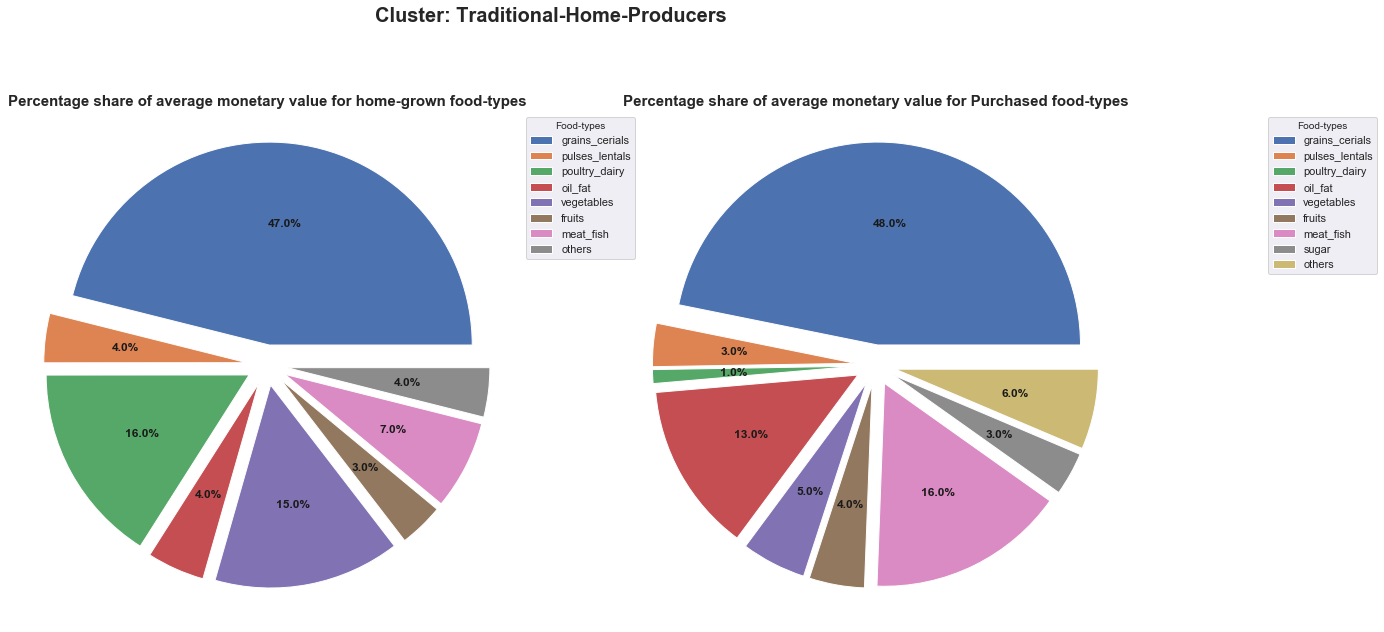

In [187]:
fig = plt.figure()
ax1 = plt.subplot(1,2,1)

explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1) 

def func2(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(absolute)

wedges, texts, autotexts = ax1.pie(trad_home2,explode=explode, autopct=lambda pct: func2(pct,trad_home2),
                                  textprops=dict(color="k"))

ax1.legend(wedges,inc2,
          loc="upper left", title = 'Food-types',
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")



def func2(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(absolute)

ax2 = plt.subplot(1,2,2)

explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1) 

wedges, texts, autotexts = ax2.pie(trad_home,explode=explode,autopct=lambda pct: func2(pct,trad_home),
                                  textprops=dict(color="k"))

ax2.legend(wedges,inc1,
          loc="best", title = 'Food-types',
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax1.set_title('Percentage share of average monetary value for home-grown food-types',\
              y=1,fontsize=15,fontweight='bold')
ax2.set_title('Percentage share of average monetary value for Purchased food-types',\
              y=1,fontsize=15,fontweight='bold')


#Set the figure size so that all four panel graphs are clearly visible
fig.set_size_inches(20,10)   
#Set a title for the figure
fig.suptitle('Cluster: Traditional-Home-Producers ',y=1,fontsize=20,fontweight='bold')



plt.show()



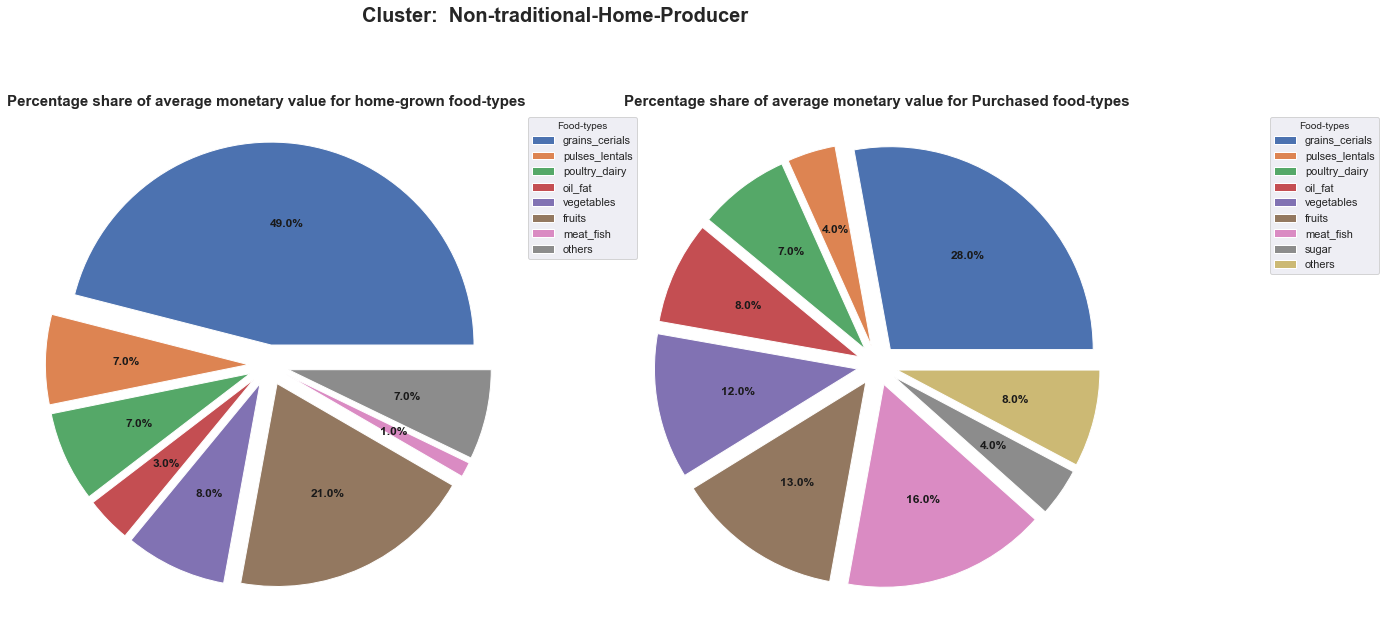

In [188]:
fig = plt.figure()
ax1 = plt.subplot(1,2,1)

explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)  

def func2(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(absolute)

wedges, texts, autotexts = ax1.pie(c_55,explode=explode, autopct=lambda pct: func2(pct,c_55),
                                  textprops=dict(color="k"))

ax1.legend(wedges,inc2,
          loc="upper left", title = 'Food-types',
          bbox_to_anchor=(1, 0, 0.5, 1))


plt.setp(autotexts, size=12, weight="bold")

ax2 = plt.subplot(1,2,2)

explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1) 

wedges, texts, autotexts = ax2.pie(c_5,explode=explode,autopct=lambda pct: func2(pct,c_5),
                                  textprops=dict(color="k"))
ax2.legend(wedges,inc1,
          loc="best", title = 'Food-types',
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax1.set_title('Percentage share of average monetary value for home-grown food-types '\
              ,y=1,fontsize=15,fontweight='bold')
ax2.set_title('Percentage share of average monetary value for Purchased food-types'\
              ,y=1,fontsize=15,fontweight='bold')


#Set the figure size so that all four panel graphs are clearly visible
fig.set_size_inches(20,10)   
#Set a title for the figure
fig.suptitle('Cluster:  Non-traditional-Home-Producer',y=1,fontsize=20,fontweight='bold')
plt.show()




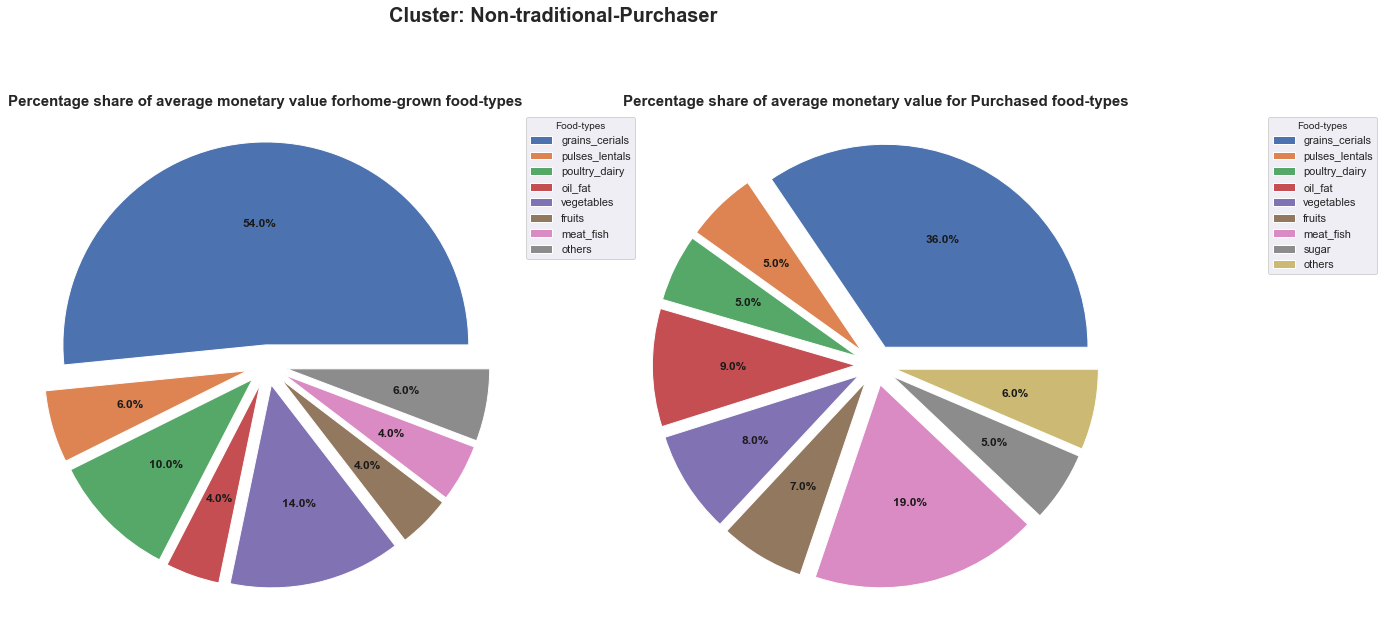

In [190]:
fig = plt.figure()
ax1 = plt.subplot(1,2,1)

explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1) 

def func2(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(absolute)

wedges, texts, autotexts = ax1.pie(c_44,explode=explode, autopct=lambda pct: func2(pct,c_44),
                                  textprops=dict(color="k"))

ax1.legend(wedges,inc2,
          loc="upper left", title = 'Food-types',
          bbox_to_anchor=(1, 0, 0.5, 1))


plt.setp(autotexts, size=12, weight="bold")


ax2 = plt.subplot(1,2,2)

explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1) 

wedges, texts, autotexts = ax2.pie(c_4,explode=explode,autopct=lambda pct: func2(pct,c_4),
                                  textprops=dict(color="k"))

ax2.legend(wedges,inc1,
          loc="best", title = 'Food-types',
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax1.set_title('Percentage share of average monetary value forhome-grown food-types '\
              ,y=1,fontsize=15,fontweight='bold')
ax2.set_title('Percentage share of average monetary value for Purchased food-types',\
              y=1,fontsize=15,fontweight='bold')


#Set the figure size so that all four panel graphs are clearly visible
fig.set_size_inches(20,10)   
#Set a title for the figure
fig.suptitle('Cluster: Non-traditional-Purchaser',y=1,fontsize=20,fontweight='bold')
plt.show()



Basket Anslysis 

In [128]:
df_association = pd.DataFrame(food_nlss1[food_nlss1.item >= 11]\
[food_nlss1[food_nlss1.item >= 11].item <= 94]\
.set_index(['WWWHH']))

#Basket for item Purchase

purchase_basket = df_association.groupby(['WWWHH','item'])['amount_purchased']\
                                    .sum() \
                                    .unstack() \
                                    .reset_index() \
                                    .fillna(0) \
                                    .set_index('WWWHH')



# recode all multiple purchases to 1
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1: 
        return 1
purchase_basket_sets = purchase_basket.applymap(encode_units)

# remove all household purchasing less than 5 different items

purchase_basket_sets = purchase_basket_sets[purchase_basket_sets.sum(axis = 1) > 15]\
.fillna(0.00)
purchase_basket_sets.columns=['Fine rice','Coarse rice','Beaten/Flattened rice' ,\
                              'Maize','Maize flour','Wheat flour','Millet',\
                              'Other grains/cerials','Black pulse','Masoor',\
                              'Rahar','Gram','Other pulses','Other beans','Eggs'\
                              ,'Milk','Condensed milk','Baby milk/powder milk',\
                              'Curd','Other milk Products','Ghee','vegetable oil',\
                              'Mustard oil','Other oil','Potatoes/Sweet Potatoes',\
                              'Onions','Cauliflower/Cabbage','Tomatoes',\
                              'Greeen leafy Vegetables','Other Vegetables','Bananas',\
                              'Citrus Fruits','Mangoes','Apples','Pineapple','Papaya',\
                              'Other fruits','Dried fruits','Fish','Mutton','Buffalo meat',\
                              'Chicken','Other meats','Salt','Cumin seed/black pepper',\
                              'turmeric','Ginger and Garlic','chilies',\
                              'Other spices and condements','Sugar',\
                              'Caramel','Sweets','Sugar Candy']
purchase_basket_sets.drop(['Salt','Cumin seed/black pepper','turmeric','Ginger and Garlic',
                           'chilies','Other spices and condements','Sugar',\
                              'Caramel','Sweets','Sugar Candy'],axis=1,inplace=True)



#Basket for item grown

growth_basket = df_association.groupby(['WWWHH','item'])['amount_grown']\
                                    .sum() \
                                    .unstack() \
                                    .reset_index() \
                                    .fillna(0) \
                                    .set_index('WWWHH')

# recode all multiple purchases to 1
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1: 
        return 1
growth_basket_sets = growth_basket.applymap(encode_units)

# remove all household purchasing less than 5 different items

growth_basket_sets = growth_basket_sets[growth_basket_sets.sum(axis = 1) > 15]\
.fillna(0.00)
growth_basket_sets.columns=['Fine rice','Coarse rice','Beaten/Flattened rice' ,\
                              'Maize','Maize flour','Wheat flour','Millet',\
                              'Other grains/cerials','Black pulse','Masoor',\
                              'Rahar','Gram','Other pulses','Other beans','Eggs'\
                              ,'Milk','Condensed milk','Baby milk/powder milk',\
                              'Curd','Other milk Products','Ghee','vegetable oil',\
                              'Mustard oil','Other oil','Potatoes/Sweet Potatoes',\
                              'Onions','Cauliflower/Cabbage','Tomatoes',\
                              'Greeen leafy Vegetables','Other Vegetables','Bananas',\
                              'Citrus Fruits','Mangoes','Apples','Pineapple','Papaya',\
                              'Other fruits','Dried fruits','Fish','Mutton','Buffalo meat',\
                              'Chicken','Other meats','Salt','Cumin seed/black pepper',\
                              'turmeric','Ginger and Garlic','chilies',\
                              'Other spices and condements','Sugar',\
                              'Caramel','Sweets','Sugar Candy']
growth_basket_sets.drop(['Salt','Cumin seed/black pepper','turmeric','Ginger and Garlic',
                           'chilies','Other spices and condements','Sugar',\
                              'Caramel','Sweets','Sugar Candy'],axis=1,inplace=True)




In [129]:
purchase_basket_sets.head()

,Fine rice,Coarse rice,Beaten/Flattened rice,Maize,Maize flour,Wheat flour,Millet,Other grains/cerials,Black pulse,Masoor,...,Apples,Pineapple,Papaya,Other fruits,Dried fruits,Fish,Mutton,Buffalo meat,Chicken,Other meats
WWWHH,,,,,,,,,,,,,,,,,,,,,
301.0,1,0.0,1.0,0.0,0,0.0,0,0,1.0,1.0,...,1.0,1.0,1,0,0,1.0,1.0,1.0,1.0,0
302.0,1,0.0,1.0,0.0,0,0.0,0,0,0.0,0.0,...,1.0,0.0,0,0,0,1.0,0.0,1.0,0.0,0
305.0,1,0.0,1.0,0.0,0,1.0,0,0,1.0,1.0,...,1.0,0.0,0,0,0,0.0,1.0,0.0,1.0,0
306.0,1,0.0,1.0,0.0,0,1.0,0,0,1.0,1.0,...,1.0,0.0,1,0,0,1.0,1.0,0.0,1.0,0
307.0,1,0.0,1.0,0.0,0,1.0,0,0,1.0,1.0,...,1.0,1.0,0,0,0,1.0,1.0,0.0,1.0,0


In [130]:
growth_basket_sets.head()

,Fine rice,Coarse rice,Beaten/Flattened rice,Maize,Maize flour,Wheat flour,Millet,Other grains/cerials,Black pulse,Masoor,...,Apples,Pineapple,Papaya,Other fruits,Dried fruits,Fish,Mutton,Buffalo meat,Chicken,Other meats
WWWHH,,,,,,,,,,,,,,,,,,,,,
105.0,0,1,0,1.0,1,1.0,0,0,1.0,1.0,...,0,0,1,0,0,1.0,0.0,0.0,1.0,0
107.0,1,1,0,1.0,0,1.0,0,0,1.0,1.0,...,0,0,1,0,0,0.0,0.0,0.0,0.0,0
114.0,0,1,1,1.0,1,1.0,0,0,0.0,1.0,...,1,0,0,0,0,0.0,1.0,0.0,1.0,0
116.0,1,1,1,1.0,0,1.0,0,0,1.0,1.0,...,0,0,1,0,0,0.0,0.0,0.0,0.0,0
605.0,0,1,0,1.0,1,1.0,1,0,1.0,0.0,...,0,0,1,0,0,0.0,0.0,0.0,0.0,0


In [172]:
trad_hh = df_expence[df_expence['cluster_label'] <=3]
trad_hh = trad_hh[trad_hh['cluster_label'] >=0]['cluster_label']
trad_hh_purchase_basket = pd.merge(trad_hh, purchase_basket_sets,\
                                   left_on = 'WWWHH', right_on = 'WWWHH')
trad_hh_purchase_basket.drop('cluster_label',axis=1,inplace=True)
frequent_itemsets = apriori(trad_hh_purchase_basket, min_support=0.5,\
                            use_colnames=True, verbose=0, low_memory=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

df_results1 = pd.DataFrame(rules)
df_results1.shape
df_results1.drop('conviction',axis=1,inplace=True)
df_results1=df_results1[df_results1["lift"] > 1.2]
df_results1.sort_values(["confidence"],ascending=False)






,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage
13023,"(Potatoes/Sweet Potatoes, Onions, Apples)","(Citrus Fruits, Cauliflower/Cabbage)",0.569959,0.728395,0.500000,0.877256,1.204369,0.084845
6906,"(Potatoes/Sweet Potatoes, Apples)","(Mangoes, Citrus Fruits)",0.592593,0.710905,0.506173,0.854167,1.201520,0.084896
6778,"(Potatoes/Sweet Potatoes, Apples)","(Citrus Fruits, Tomatoes)",0.592593,0.701646,0.502058,0.847222,1.207478,0.086267
13033,"(Potatoes/Sweet Potatoes, Apples)","(Citrus Fruits, Onions, Cauliflower/Cabbage)",0.592593,0.695473,0.500000,0.843750,1.213203,0.087868
7201,"(Onions, Apples)","(Citrus Fruits, Tomatoes)",0.593621,0.701646,0.500000,0.842288,1.200445,0.083488
13037,"(Onions, Apples)","(Potatoes/Sweet Potatoes, Citrus Fruits, Cauli...",0.593621,0.694444,0.500000,0.842288,1.212894,0.087763
17295,"(Bananas, Milk, Cauliflower/Cabbage)","(Mangoes, Potatoes/Sweet Potatoes, Tomatoes, O...",0.613169,0.687243,0.508230,0.828859,1.206064,0.086835
7205,(Apples),"(Citrus Fruits, Tomatoes, Onions)",0.627572,0.663580,0.500000,0.796721,1.200640,0.083556
7192,"(Citrus Fruits, Tomatoes, Onions)",(Apples),0.663580,0.627572,0.500000,0.753488,1.200640,0.083556
17234,"(Mangoes, Potatoes/Sweet Potatoes, Tomatoes, O...","(Bananas, Milk, Cauliflower/Cabbage)",0.687243,0.613169,0.508230,0.739521,1.206064,0.086835


In [171]:
trad_hh = df_expence[df_expence['cluster_label'] <=3]
trad_hh = trad_hh[trad_hh['cluster_label'] >=0]['cluster_label']
trad_hh_growth_basket = pd.merge(trad_hh, growth_basket_sets,\
                                 left_on = 'WWWHH', right_on = 'WWWHH')
trad_hh_growth_basket.drop('cluster_label',axis=1,inplace=True)
frequent_itemsets = apriori(trad_hh_growth_basket, min_support=0.5,\
                            use_colnames=True, verbose=0, low_memory=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)

df_results1 = pd.DataFrame(rules)
df_results1.shape
df_results1.drop('conviction',axis=1,inplace=True)
df_results1 = df_results1[df_results1["lift"] > 1.166]
df_results1.sort_values(["confidence"],ascending=False)





,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage
12273,"(Maize, Ghee, Cauliflower/Cabbage)","(Tomatoes, Milk)",0.540816,0.806122,0.510204,0.943396,1.170289,0.074240
19784,"(Maize, Potatoes/Sweet Potatoes, Ghee, Caulifl...","(Tomatoes, Milk)",0.530612,0.806122,0.500000,0.942308,1.168939,0.072262
15731,"(Bananas, Tomatoes, Onions)","(Potatoes/Sweet Potatoes, Cauliflower/Cabbage)",0.591837,0.724490,0.500000,0.844828,1.166100,0.071220
22741,"(Bananas, Ghee, Tomatoes)","(Maize, Potatoes/Sweet Potatoes, Milk, Mustard...",0.622449,0.714286,0.520408,0.836066,1.170492,0.075802
7272,"(Cauliflower/Cabbage, Mustard oil)","(Tomatoes, Onions)",0.642857,0.693878,0.530612,0.825397,1.189542,0.084548
15637,"(Mustard oil, Potatoes/Sweet Potatoes, Caulifl...","(Tomatoes, Onions)",0.632653,0.693878,0.520408,0.822581,1.185484,0.081424
5116,"(Maize, Cauliflower/Cabbage)","(Tomatoes, Onions)",0.653061,0.693878,0.530612,0.812500,1.170956,0.077468
13114,"(Maize, Potatoes/Sweet Potatoes, Cauliflower/C...","(Tomatoes, Onions)",0.642857,0.693878,0.520408,0.809524,1.166667,0.074344
15651,"(Mustard oil, Cauliflower/Cabbage)","(Potatoes/Sweet Potatoes, Tomatoes, Onions)",0.642857,0.683673,0.520408,0.809524,1.184080,0.080904
5117,"(Tomatoes, Onions)","(Maize, Cauliflower/Cabbage)",0.693878,0.653061,0.530612,0.764706,1.170956,0.077468


In [149]:
trad_purc = df_expence[df_expence['cluster_label'] == 0]['cluster_label']
trad_purc_purchase_basket = pd.merge(trad_purc, purchase_basket_sets,\
                                     left_on = 'WWWHH', right_on = 'WWWHH')
trad_purc_purchase_basket.drop('cluster_label',axis=1,inplace=True)
frequent_itemsets = apriori(trad_purc_purchase_basket, min_support=0.5,\
                            use_colnames=True, verbose=0, low_memory=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

df_results1 = pd.DataFrame(rules)
df_results1.shape
df_results1.drop('conviction',axis=1,inplace=True)
df_results1 = df_results1[df_results1["lift"] > 1.2]
df_results1.sort_values(["confidence"],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage
15827,"(Onions, Apples)","(Bananas, Potatoes/Sweet Potatoes, Citrus Fruits)",0.608324,0.688367,0.506937,0.833333,1.210594,0.088186
15823,"(Potatoes/Sweet Potatoes, Apples)","(Bananas, Citrus Fruits, Onions)",0.610459,0.686233,0.506937,0.830420,1.210114,0.088020
15943,"(Potatoes/Sweet Potatoes, Apples)","(Mangoes, Citrus Fruits, Onions)",0.610459,0.684098,0.502668,0.823427,1.203667,0.085054
15707,"(Onions, Apples)","(Potatoes/Sweet Potatoes, Citrus Fruits, Tomat...",0.608324,0.685165,0.500534,0.822807,1.200888,0.083731
15703,"(Potatoes/Sweet Potatoes, Apples)","(Citrus Fruits, Tomatoes, Onions)",0.610459,0.677695,0.500534,0.819930,1.209881,0.086829
15822,"(Bananas, Citrus Fruits, Onions)","(Potatoes/Sweet Potatoes, Apples)",0.686233,0.610459,0.506937,0.738725,1.210114,0.088020
15702,"(Citrus Fruits, Tomatoes, Onions)","(Potatoes/Sweet Potatoes, Apples)",0.677695,0.610459,0.500534,0.738583,1.209881,0.086829
15818,"(Bananas, Potatoes/Sweet Potatoes, Citrus Fruits)","(Onions, Apples)",0.688367,0.608324,0.506937,0.736434,1.210594,0.088186
15942,"(Mangoes, Citrus Fruits, Onions)","(Potatoes/Sweet Potatoes, Apples)",0.684098,0.610459,0.502668,0.734789,1.203667,0.085054
15698,"(Potatoes/Sweet Potatoes, Citrus Fruits, Tomat...","(Onions, Apples)",0.685165,0.608324,0.500534,0.730530,1.200888,0.083731


In [162]:
trad_purc = df_expence[df_expence['cluster_label'] == 0]['cluster_label']
trad_purc_growth_basket = pd.merge(trad_purc, growth_basket_sets,\
                                   left_on = 'WWWHH', right_on = 'WWWHH')
trad_purc_growth_basket.drop('cluster_label',axis=1,inplace=True)
frequent_itemsets = apriori(trad_purc_growth_basket, min_support=0.5,\
                            use_colnames=True, verbose=0, low_memory=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)


df_results1 = pd.DataFrame(rules)
df_results1.shape
df_results1.drop('conviction',axis=1,inplace=True)
df_results1 = df_results1[df_results1["lift"] > 1.0]
df_results1.sort_values(["confidence"],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage
24385,"(Potatoes/Sweet Potatoes, Maize, Ghee, Wheat f...",(Milk),0.5625,0.9250,0.5625,1.000000,1.081081,0.042187
13471,"(Maize, Wheat flour, Ghee, Tomatoes)",(Milk),0.6125,0.9250,0.6125,1.000000,1.081081,0.045937
13531,"(Maize, Wheat flour, Ghee, Papaya)",(Milk),0.5125,0.9250,0.5125,1.000000,1.081081,0.038437
25872,"(Potatoes/Sweet Potatoes, Maize, Onions, Ghee,...",(Milk),0.5000,0.9250,0.5000,1.000000,1.081081,0.037500
25828,"(Maize, Bananas, Ghee, Mustard oil)","(Potatoes/Sweet Potatoes, Milk)",0.5500,0.9125,0.5500,1.000000,1.095890,0.048125
...,...,...,...,...,...,...,...,...
30029,(Potatoes/Sweet Potatoes),"(Maize, Ghee, Milk, Wheat flour, Bananas, Must...",0.9875,0.5000,0.5000,0.506329,1.012658,0.006250
20575,(Potatoes/Sweet Potatoes),"(Mustard oil, Bananas, Ghee, Cauliflower/Cabbage)",0.9875,0.5000,0.5000,0.506329,1.012658,0.006250
9223,(Potatoes/Sweet Potatoes),"(Bananas, Tomatoes, Papaya)",0.9875,0.5000,0.5000,0.506329,1.012658,0.006250
2190,(Potatoes/Sweet Potatoes),"(Mangoes, Onions)",0.9875,0.5000,0.5000,0.506329,1.012658,0.006250


In [165]:
trad_home = df_expence[df_expence['cluster_label'] == 4]['cluster_label']
trad_home_purchase_basket = pd.merge(trad_home, purchase_basket_sets,\
                                     left_on = 'WWWHH', right_on = 'WWWHH')
trad_home_purchase_basket.drop('cluster_label',axis=1,inplace=True)
frequent_itemsets = apriori(trad_home_purchase_basket, min_support=0.5,\
                            use_colnames=True, verbose=0, low_memory=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

df_results1 = pd.DataFrame(rules)
df_results1.shape
df_results1.drop('conviction',axis=1,inplace=True)
df_results1 = df_results1[df_results1["lift"] > 1.15]
df_results1.sort_values(["confidence"],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage
16,(Wheat flour),(Mustard oil),0.529412,0.823529,0.529412,1.000000,1.214286,0.093426
10314,"(Mangoes, Tomatoes, Milk, Apples)",(Citrus Fruits),0.529412,0.823529,0.529412,1.000000,1.214286,0.093426
10137,"(Mangoes, Citrus Fruits, Tomatoes)","(Bananas, Milk)",0.588235,0.823529,0.588235,1.000000,1.214286,0.103806
4229,"(Curd, Potatoes/Sweet Potatoes, Onions)",(Citrus Fruits),0.529412,0.823529,0.529412,1.000000,1.214286,0.093426
5602,"(Potatoes/Sweet Potatoes, Apples, Mutton)",(Citrus Fruits),0.588235,0.823529,0.588235,1.000000,1.214286,0.103806
...,...,...,...,...,...,...,...,...
1831,(Mustard oil),"(Beaten/Flattened rice, Milk, Mutton)",0.823529,0.529412,0.529412,0.642857,1.214286,0.093426
11989,(Citrus Fruits),"(Bananas, Tomatoes, Apples, Mutton)",0.823529,0.529412,0.529412,0.642857,1.214286,0.093426
1839,"(Milk, Mustard oil)","(Wheat flour, Mutton)",0.823529,0.529412,0.529412,0.642857,1.214286,0.093426
11929,(Citrus Fruits),"(Mangoes, Bananas, Tomatoes, Apples)",0.823529,0.529412,0.529412,0.642857,1.214286,0.093426


In [94]:
trad_home = df_expence[df_expence['cluster_label'] == 4]['cluster_label']
trad_home_growth_basket = pd.merge(trad_home, growth_basket_sets,\
                                   left_on = 'WWWHH', right_on = 'WWWHH')
trad_home_growth_basket.drop('cluster_label',axis=1,inplace=True)
frequent_itemsets = apriori(trad_home_growth_basket, min_support=0.5,\
                            use_colnames=True, verbose=0, low_memory=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)


df_results1 = pd.DataFrame(rules)
df_results1.shape
df_results1.drop('conviction',axis=1,inplace=True)
df_results1 = df_results1[df_results1["lift"] > 1.0]
df_results1.sort_values(["confidence"],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage
38,"(Coarse rice, Milk)",(Wheat flour),0.500000,0.888889,0.500000,1.0000,1.125000,0.055556
62,"(Potatoes/Sweet Potatoes, Milk)",(Wheat flour),0.583333,0.888889,0.583333,1.0000,1.125000,0.064815
17,(Milk),(Wheat flour),0.722222,0.888889,0.722222,1.0000,1.125000,0.080247
15,(Rahar),(Wheat flour),0.500000,0.888889,0.500000,1.0000,1.125000,0.055556
67,"(Mangoes, Milk)",(Wheat flour),0.583333,0.888889,0.583333,1.0000,1.125000,0.064815
...,...,...,...,...,...,...,...,...
46,(Wheat flour),"(Mangoes, Coarse rice)",0.888889,0.611111,0.555556,0.6250,1.022727,0.012346
18,(Wheat flour),(Mustard oil),0.888889,0.555556,0.500000,0.5625,1.012500,0.006173
14,(Wheat flour),(Rahar),0.888889,0.500000,0.500000,0.5625,1.125000,0.055556
11,(Wheat flour),(Beaten/Flattened rice),0.888889,0.527778,0.500000,0.5625,1.065789,0.030864
